<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [236]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [398]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [401]:
data = pd.read_csv('/content/drive/My Drive/Dataset/BAJAS_.txt',delimiter='~')
x  = data.iloc[:,:-1].values
y  = data.iloc[:,2]
y = y[:,np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
data

In [ ]:
#data.info()
data.describe()

In [421]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.2, random_state = 0)                                    

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_m1 = logreg.predict(x_test)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

#Modelo vectores de soporte
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_predic_test = svc.predict(x_test)
y_predic_train = svc.predict(x_train)
print('Precisión Vectores de soporte')
print(svc.score(x_train,y_train))
 

Precisión Modelo Regresión Logística
0.875
Precisión Vectores de soporte
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

TypeError: ignored

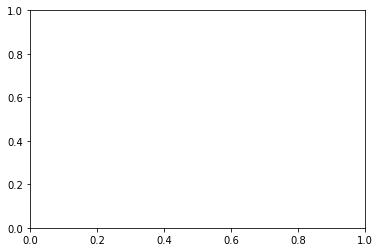

In [425]:
#gráfica
plt.scatter(x, y, c='Blue', marker='^', alpha=0.5)
plt.scatter(x_test , y_test , c='red', marker='*', alpha=0.5)
plt.scatter(x, y_predic_train, c='green', marker='o', alpha=0.3)
plt.scatter(x_test , y_predic_test , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes')
plt.show()